# Numerische Integration

## Vertiefung

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Übersicht


1. Trapezformel vektorisiert implementieren
2. Fehlerabschätzung
3. Trapezformel für Daten mit ungleichmässigem Abstand
4. SciPy-Integration

### 1. Trapezformel vektorisiert implementieren

Vorgehen beim Integrieren mit der [Trapezregel](https://de.wikipedia.org/wiki/Trapezregel):

- Zerlege das Intervall $[a,b]$ in $n$ gleich breite Intervalle.
- Berechne Funktionswerte an den Intervallgrenzen und verbinde diese mit Geraden, so dass $n-1$ Trapeze entstehen.
- Berechne die Flächen der Trapeze.
- Die Summe aller Flächen ergibt eine Näherung des Integrals.
- Je größer $n$ desto genauer das Ergebnis.

$$ T_n = \frac{h}{2} \left( f(a) + 2\sum_{i=1}^{n-1} f(a + ih) + f(b) \right) \,,\qquad\text{wobei}\quad h = \frac{b-a}{n} $$

In [2]:
def trapezregel(func, a, b, n):
    h = b - a
    s = 0
    # for i in range(1, n):  # weil range nicht der letzte wert nimmt
    # s += func(a + i * h)
    s = sum(func(a + i * h) for i in range(1, n))
    x = [a + i * h for i in range(1, n)]
    s = sum(map(func, x))
    s = sum(map(func, x))
    s = sum(map(func, [a + i * h for i in range(1, n)] ))
    x =  a + np.arange(1,n) * h
    return 0.5 * h * (func(a) + 2 * s + func(b))


In [3]:

a = 1 
b = 4
n = 6 
h = (b-a) / n 
a + np.arange(1,n)*h # array nimmt lässt die aussen punkte aus 
np.linspace(a+h,b-h,n-1) 

array([1.5, 2. , 2.5, 3. , 3.5])

Test mit der Funktion

$$ f(x) = \sin(x) $$

[Analytisches Resultat](https://www.wolframalpha.com/input?i=int+sin%28x%29+from+0+to+2pi):

$$ \int_0^{2\pi} \sin(x) \,dx = 0 $$

Numerische Näherung ausrechnen und visualisieren.

In [ ]:
def 

In [ ]:
n = 10 
T1  = trapezregel_comprehension(np.sin, 0, )

### 2. Fehlerabschätzung


#### Explorativ

Abhängigkeit des Fehlers von $n$. Beispiel von oben.

In [4]:
np.logspace

array([1.00000000e+01, 1.20679264e+01, 1.45634848e+01, 1.75751062e+01,
       2.12095089e+01, 2.55954792e+01, 3.08884360e+01, 3.72759372e+01,
       4.49843267e+01, 5.42867544e+01, 6.55128557e+01, 7.90604321e+01,
       9.54095476e+01, 1.15139540e+02, 1.38949549e+02, 1.67683294e+02,
       2.02358965e+02, 2.44205309e+02, 2.94705170e+02, 3.55648031e+02,
       4.29193426e+02, 5.17947468e+02, 6.25055193e+02, 7.54312006e+02,
       9.10298178e+02, 1.09854114e+03, 1.32571137e+03, 1.59985872e+03,
       1.93069773e+03, 2.32995181e+03, 2.81176870e+03, 3.39322177e+03,
       4.09491506e+03, 4.94171336e+03, 5.96362332e+03, 7.19685673e+03,
       8.68511374e+03, 1.04811313e+04, 1.26485522e+04, 1.52641797e+04,
       1.84206997e+04, 2.22299648e+04, 2.68269580e+04, 3.23745754e+04,
       3.90693994e+04, 4.71486636e+04, 5.68986603e+04, 6.86648845e+04,
       8.28642773e+04, 1.00000000e+05])

### Logarithmische skala entscheiden 

**bei den einfach und zweifach logarithmisierte funktion macht man an den x, y Achse**

**einfache logarithmus und gerade -> exponential**
**zweifach logarithmus und gerade -> potenzfunktion**

je grösser f'' ist umso schlechter ist der fehler -> grösser 
das heisst wiederrum dass man n wieder grösser wählen muss um diesen fehler zu kompensieren was wiederrum einen grösseren E_wert git

#### Trapezregel Abschätzung

Eine analytische Fehlerabschätzung ist auf [Wikipedia](https://de.wikipedia.org/wiki/Trapezregel) zu finden. Der Fehler

$$ E_n = \int_a^b (x) \,dx - T_n $$

ist beschränkt durch

$$ \left| E_n \right| \leq \frac{(b-a)}{12} h^2 M_2 = \frac{(b-a)^3}{12 n^2} M_2 $$

wobei

$$ M_2 = \max_{a \leq x \leq b} \left| f''(x) \right| $$


Videos:

- [Fehler der Trapezregel für numerische Integration - Jörn Loviscach](https://youtu.be/JwPlWzP-K1A)
- [Analysis Numerische Integration: Trapezformel Abschätzung des Fehlers (Trapezregel) - Henning Dierks](https://youtu.be/PifHwEaUxoo)


### 3. Trapezformel für Daten mit ungleichmässigem Abstand

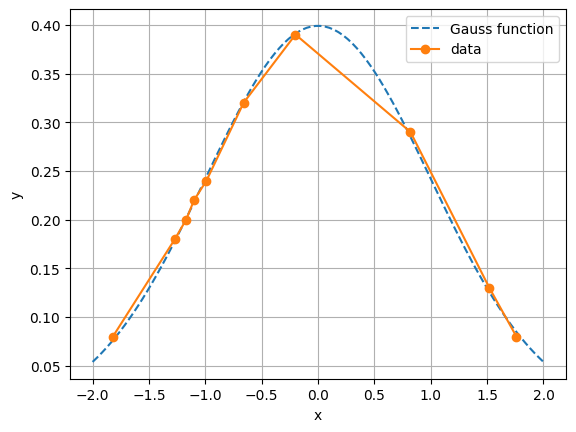

In [4]:
def gauss(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))


x = np.linspace(-2, 2, 100)
y = gauss(x)

n_samples = 10
rng = np.random.default_rng(8888)
xi = np.round(np.sort(rng.uniform(low=x.min(), high=x.max(), size=n_samples)), 2)
yi = np.round(gauss(xi), 2)

plt.plot(x, y, "--", label="Gauss function")
plt.plot(xi, yi, "o-", label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


Trapezformel für Daten mit ungleichmässigem Abstand.

In [ ]:
def gauss_quadratur(x_data, y_data):
    dx = np.diff(x_data)
    return


### 4. SciPy-Integration

- Übersichtsseite: [SciPy-Integration](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)
- Integration von Funktionen mit [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)
- Integration von Daten mit [`scipy.integrate.trapezoid`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html)